In [1]:
# Data manipulation packages
import numpy as np
import pandas as pd

# Financial packages
import talib as ta
import yfinance as yf
import pyfolio as pf

# Graphing packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

import datetime

/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [12]:
data = yf.download('MSFT')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064384,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400
...,...,...,...,...,...,...
2022-06-06,272.059998,274.179993,267.220001,268.750000,268.750000,22400300
2022-06-07,266.640015,273.130005,265.940002,272.500000,272.500000,22860700
2022-06-08,271.709991,273.000000,269.609985,270.410004,270.410004,17372300


In [13]:
#indicator
sma = 20
data['sma'] = data['Adj Close'].rolling(window=sma).mean()
data.dropna(inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume,sma
Date,,,,,,,
1986-04-10,0.097222,0.098958,0.095486,0.098090,0.061655,13881600,0.060455
1986-04-11,0.098958,0.101563,0.098958,0.099826,0.062746,17222400,0.060537
1986-04-14,0.099826,0.101563,0.099826,0.100694,0.063292,12153600,0.060537
1986-04-15,0.100694,0.100694,0.097222,0.100694,0.063292,9302400,0.060482
1986-04-16,0.100694,0.105035,0.099826,0.104167,0.065475,31910400,0.060618
...,...,...,...,...,...,...,...
2022-06-06,272.059998,274.179993,267.220001,268.750000,268.750000,22400300,263.724786
2022-06-07,266.640015,273.130005,265.940002,272.500000,272.500000,22860700,264.151527
2022-06-08,271.709991,273.000000,269.609985,270.410004,270.410004,17372300,264.228339


In [14]:
data['returns'] = data['Adj Close'].pct_change()

In [15]:
#signals
data['signal'] = np.where(data['Adj Close'].shift(1) > data['sma'].shift(1), 1, 0)
data['signal'].value_counts()

1    5535
0    3583
Name: signal, dtype: int64

In [16]:
# Strategy returns 
data['strategy_returns'] = data['returns'].shift(-1) * data['signal']
data

,Open,High,Low,Close,Adj Close,Volume,sma,returns,signal,strategy_returns
Date,,,,,,,,,,
1986-04-10,0.097222,0.098958,0.095486,0.098090,0.061655,13881600,0.060455,NaN,0,0.000000
1986-04-11,0.098958,0.101563,0.098958,0.099826,0.062746,17222400,0.060537,0.017698,1,0.008695
1986-04-14,0.099826,0.101563,0.099826,0.100694,0.063292,12153600,0.060537,0.008695,1,0.000000
1986-04-15,0.100694,0.100694,0.097222,0.100694,0.063292,9302400,0.060482,0.000000,1,0.034491
1986-04-16,0.100694,0.105035,0.099826,0.104167,0.065475,31910400,0.060618,0.034491,1,0.008332
...,...,...,...,...,...,...,...,...,...,...
2022-06-06,272.059998,274.179993,267.220001,268.750000,268.750000,22400300,263.724786,-0.004703,1,0.013953
2022-06-07,266.640015,273.130005,265.940002,272.500000,272.500000,22860700,264.151527,0.013953,1,-0.007670
2022-06-08,271.709991,273.000000,269.609985,270.410004,270.410004,17372300,264.228339,-0.007670,1,-0.020783


In [17]:
data['entry'] = data['signal'].diff()
data.dropna(inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume,sma,returns,signal,strategy_returns,entry
Date,,,,,,,,,,,
1986-04-11,0.098958,0.101563,0.098958,0.099826,0.062746,17222400,0.060537,0.017698,1,0.008695,1.0
1986-04-14,0.099826,0.101563,0.099826,0.100694,0.063292,12153600,0.060537,0.008695,1,0.000000,0.0
1986-04-15,0.100694,0.100694,0.097222,0.100694,0.063292,9302400,0.060482,0.000000,1,0.034491,0.0
1986-04-16,0.100694,0.105035,0.099826,0.104167,0.065475,31910400,0.060618,0.034491,1,0.008332,0.0
1986-04-17,0.104167,0.105035,0.104167,0.105035,0.066020,22003200,0.060837,0.008332,1,-0.033055,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03,270.309998,273.450012,268.410004,270.019989,270.019989,28048000,263.991867,-0.016607,1,-0.004703,0.0
2022-06-06,272.059998,274.179993,267.220001,268.750000,268.750000,22400300,263.724786,-0.004703,1,0.013953,0.0
2022-06-07,266.640015,273.130005,265.940002,272.500000,272.500000,22860700,264.151527,0.013953,1,-0.007670,0.0


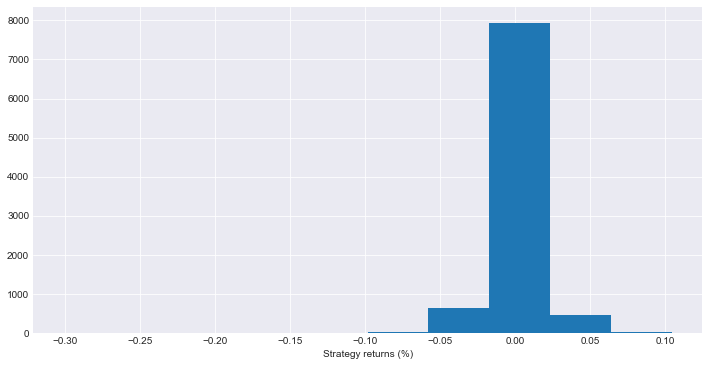

In [18]:
import matplotlib.pyplot as plt
data.strategy_returns.hist()
plt.xlabel('Strategy returns (%)')
plt.show()

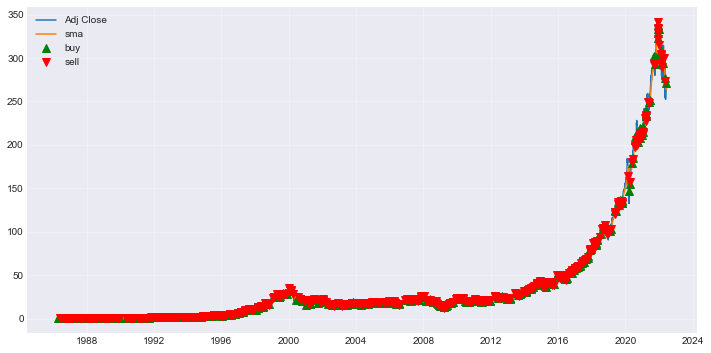

In [19]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(data['Adj Close'], label = 'Adj Close')
plt.plot(data['sma'], label = 'sma')
plt.plot(data[data.entry == 1].index, data['Adj Close'][data.entry == 1], '^', color = 'g', markersize = 8,label='buy')
plt.plot(data[data.entry == -1].index, data['Adj Close'][data.entry == -1], 'v',color = 'r', markersize = 8,label='sell')
plt.legend()

/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/alfred/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


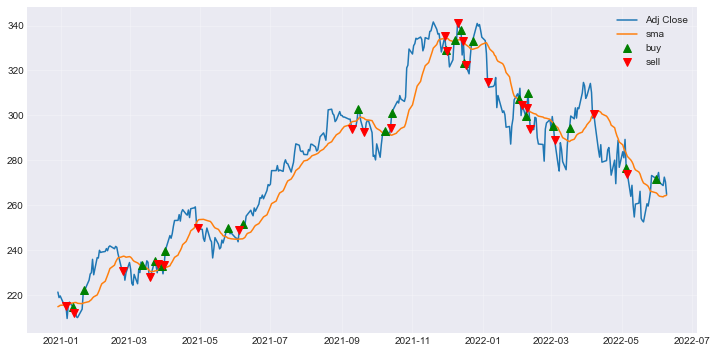

In [30]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(data['Adj Close'][-365:], label = 'Adj Close')
plt.plot(data['sma'][-365:], label = 'sma')
plt.plot(data[-365:][data.entry == 1].index, data['Adj Close'][-365:][data.entry == 1], '^', color = 'g', markersize = 8,label='buy')
plt.plot(data[-365:][data.entry == -1].index, data['Adj Close'][-365:][data.entry == -1], 'v',color = 'r', markersize = 8,label='sell')
plt.legend()

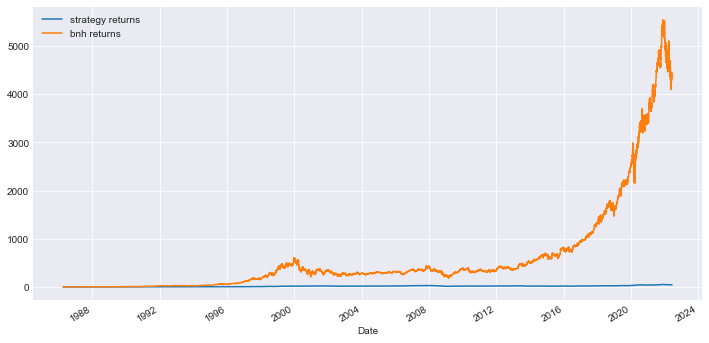

In [20]:
(data.strategy_returns+1).cumprod().plot(label='strategy returns')
(data.returns+1).cumprod().plot(label='bnh returns')
plt.legend()

Start date,1986-04-11
End date,2022-06-09
Total months,434
,Backtest
Annual return,11.0%
Cumulative returns,4261.3%
Annual volatility,24.0%
Sharpe ratio,0.56
Calmar ratio,0.19
Stability,0.80
Max drawdown,-57.1%


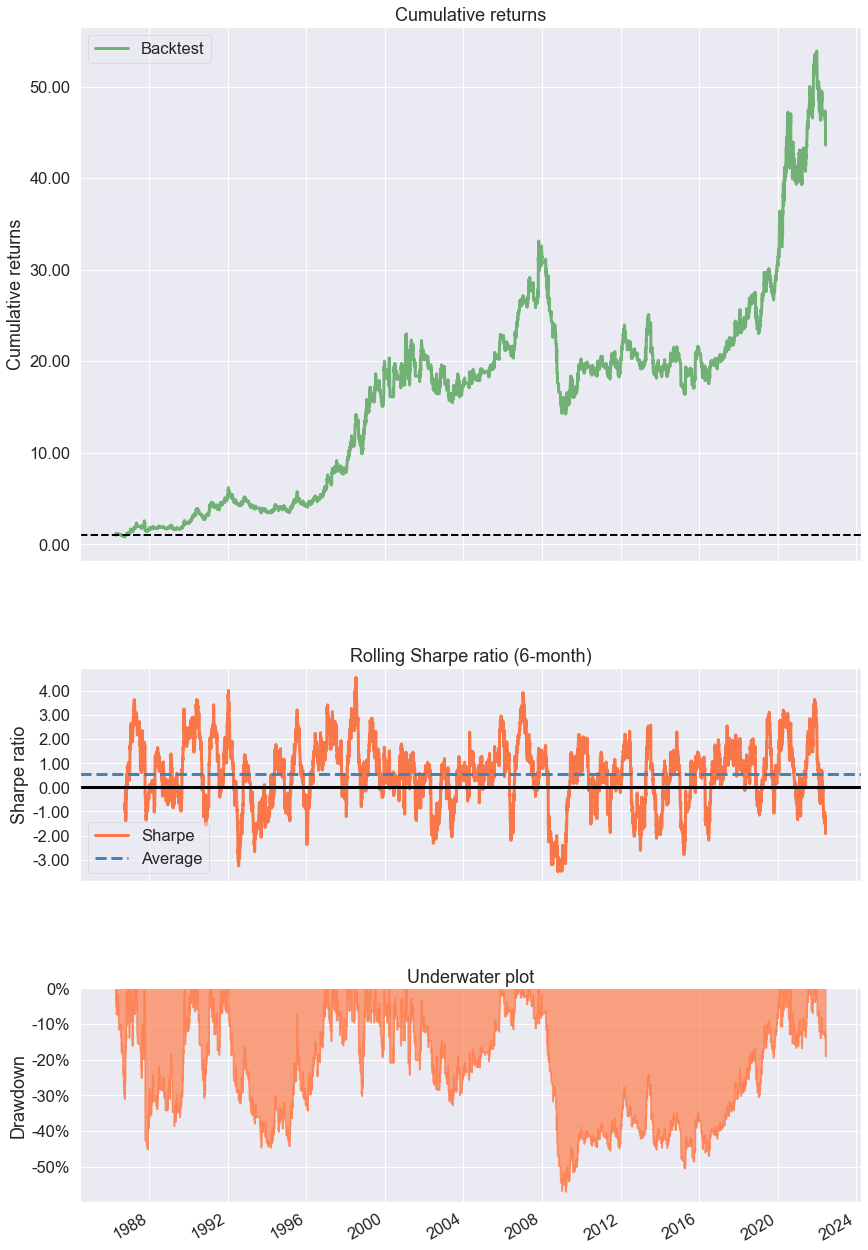

In [21]:
pf.create_simple_tear_sheet(data.strategy_returns)